# Titanic Project

Problem Statement:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
### the objective is to predict if an arbitrary passenger on titanic would survive the sink or not, 
###hence its a classification problem

# Loading libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt               #for plotting and EDA
import seaborn as sns                         #for plotting and EDA
from sklearn.linear_model import LogisticRegression             #classification model
from sklearn.naive_bayes import GaussianNB                      #classification model
from sklearn.tree import DecisionTreeClassifier                 #classification model
from sklearn.ensemble import RandomForestClassifier             #classification model
from sklearn.svm import SVC                                     #classification model
from sklearn.model_selection import train_test_split            #for splitting dataset into training and testing
from sklearn.metrics import accuracy_score                      #for checking model accuracy
from sklearn.metrics import confusion_matrix, classification_report      #for checking model accuracy
from sklearn.model_selection import cross_val_score                      #for cross validating model
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('TitanicDS.csv')

In [4]:
df = pd.DataFrame(data = df)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.dtypes                      #for checking the data types of all the columns present

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerID, Survived, Pclass, SibSp, Parch are int64 data type.

Age and Fare are float64 data type

While Name, Sex, Ticket, Cabin, Embarked are all object data type

# Checking and treating missing values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Out of 891 rows, 687 have missing values for cabin, it will be better to drop this column instead of treating it for missing values

Age has 177 rows with missing values which can be treated by simple imputer

Embarked only has 2 missing values which will be treated by simple imputer

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
feat = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [11]:
x = df[feat]
y = df['Survived']

Name and ticket were also dropped along with cabin because they were unique features which would not be useful to the model for predictions. While Survived is the Target variable.

In [12]:
s = (x.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Sex', 'Embarked']


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x['Sex'] = label_encoder.fit_transform(x['Sex'])

In [14]:
x['Embarked'].replace('C', 0, inplace = True)
x['Embarked'].replace('Q', 1, inplace = True)
x['Embarked'].replace('S', 2, inplace = True)

In [15]:
x.dtypes

PassengerId      int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked       float64
dtype: object

Object data types converted to float64

In [16]:
from sklearn.impute import SimpleImputer

si = SimpleImputer()
imp_x = pd.DataFrame(si.fit_transform(x))

imp_x.columns = x.columns

In [17]:
imp_x.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

All missing values are treated with simple imputer

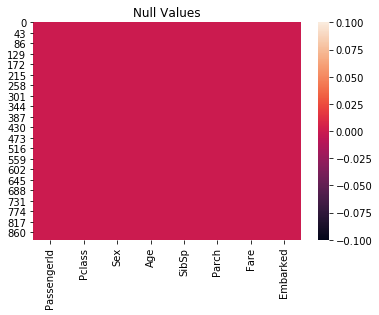

In [18]:
sns.heatmap(imp_x.isnull())                                  #no null values present in the dataset
plt.title('Null Values')
plt.show()

In [19]:
imp_x.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.535433
std,257.353842,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791197
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Age and Fare are the only continuous data,
mean and median for age is same at 29.69 with maximum value 80 and minimum value 0.42.
Mean for fare is 32.20 while median is 14.45. Max and min value for fare is 512.32 and 0

In [20]:
x = imp_x

In [21]:
cont = ['Age', 'Fare']
cate = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# EDA

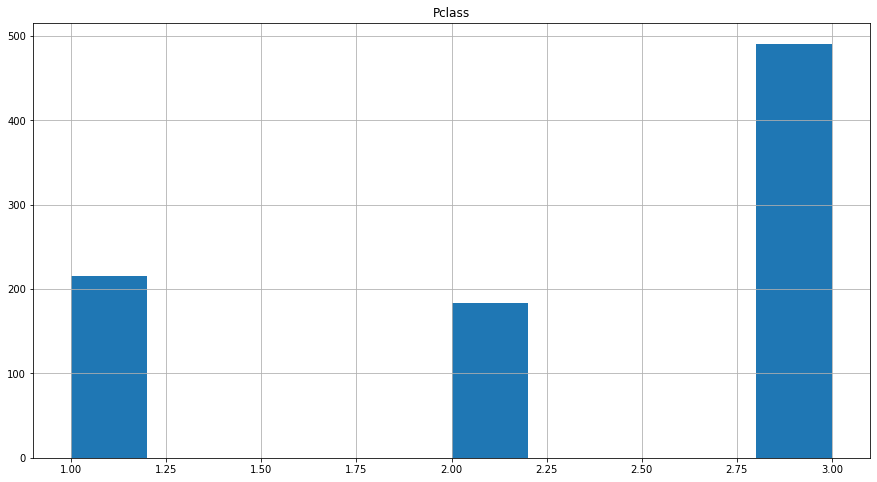

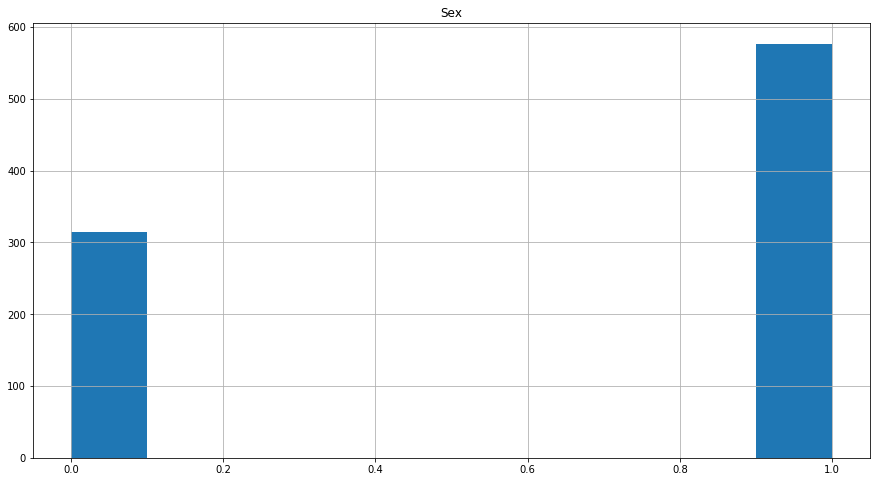

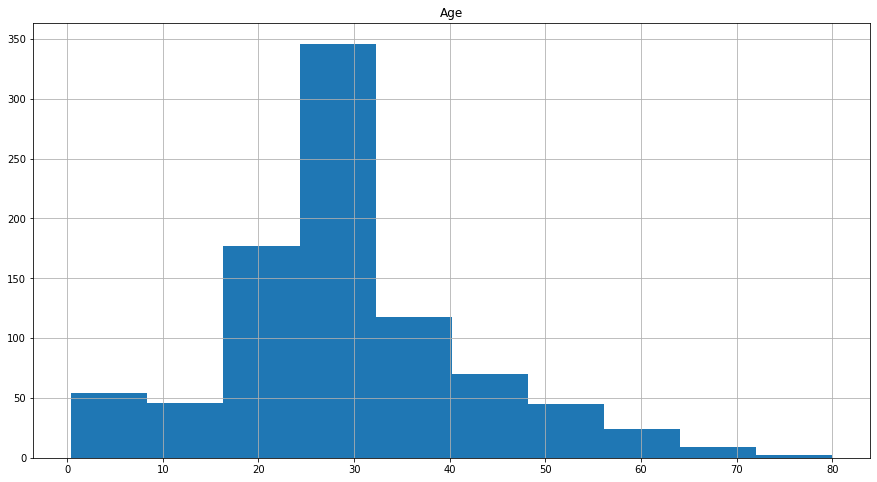

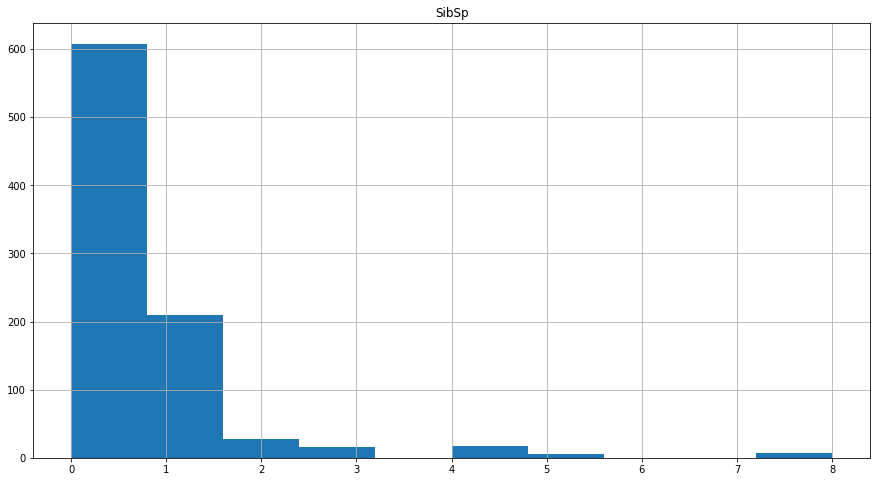

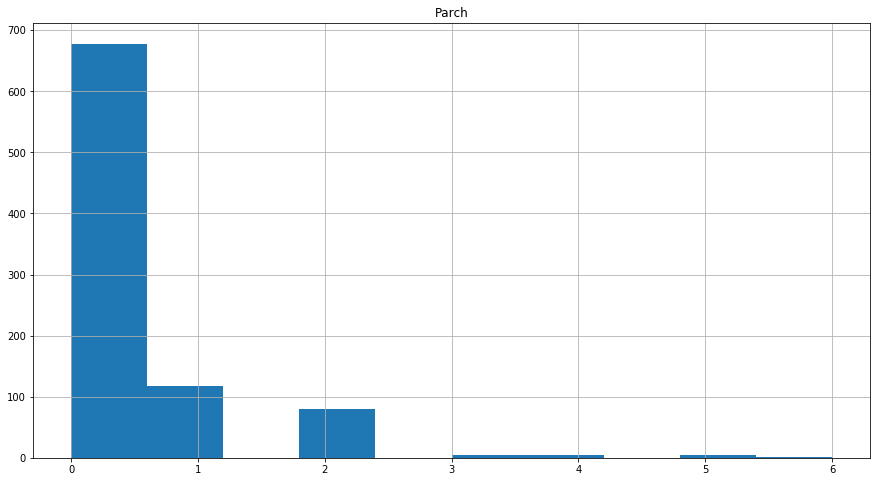

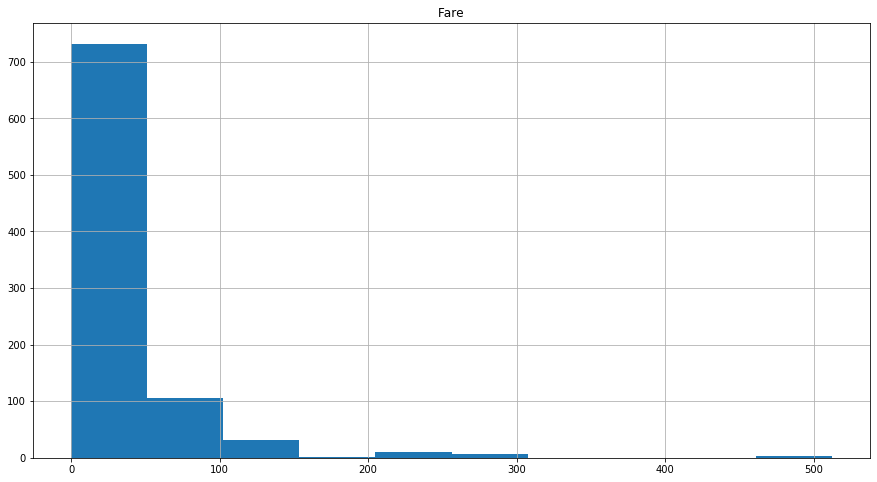

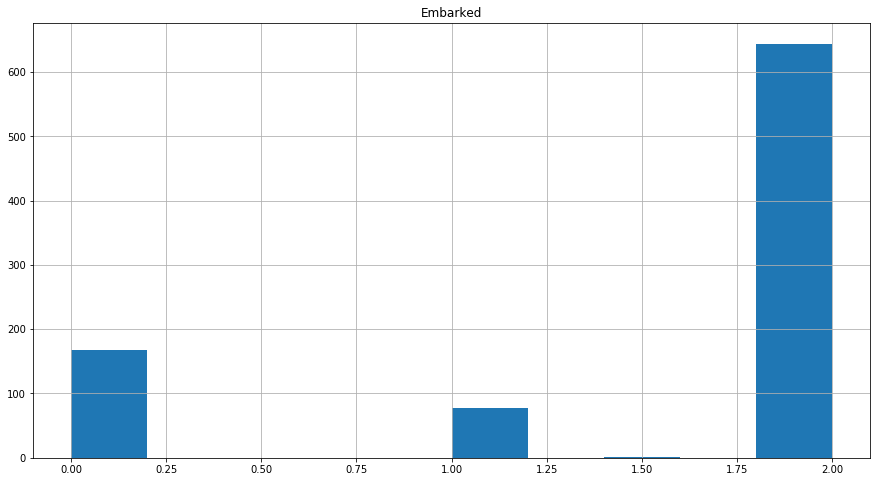

In [22]:
for i in feat[1:]:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    x[i].hist(grid = True)
    plt.title(i)
    plt.show()

Observations from graphs:

In Pclass '3' has the highest value count just below 500 and '2' with the lowest value count below 200.

Male population is higher in comparison with Female population.

Very few population was over the age of 50 with most of the population being between the ages of 20-40

Most of the population were either travelling alone or with 1 sibling or spouse at most.

Fare for most of the population was below 100

Most of the population embarked from Southampton

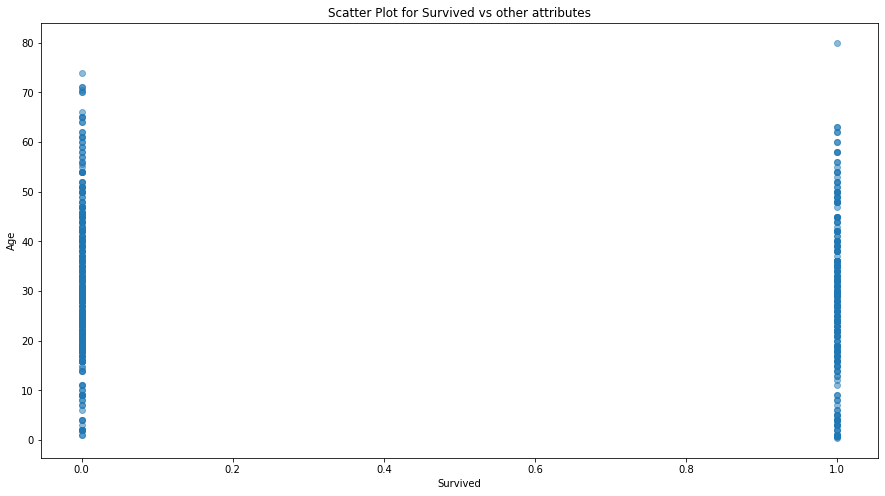

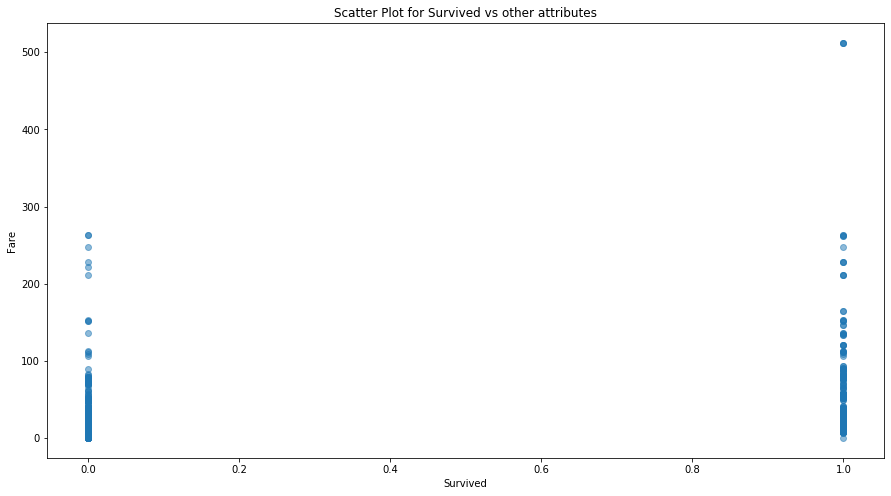

In [23]:
for i in cont:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    plt.scatter(df['Survived'], x[i], alpha = 0.5)
    plt.title('Scatter Plot for Survived vs other attributes')
    plt.xlabel('Survived')
    plt.ylabel(i)  
    plt.show()

Not much can be inferred from these graphs

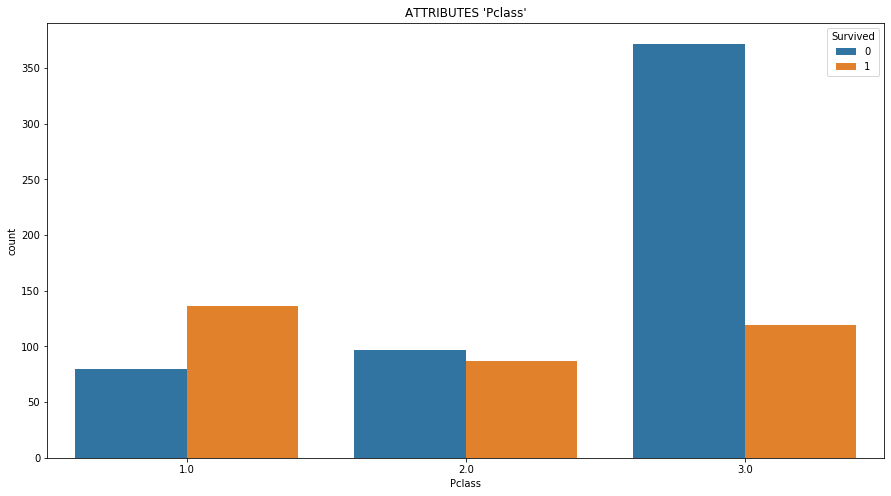

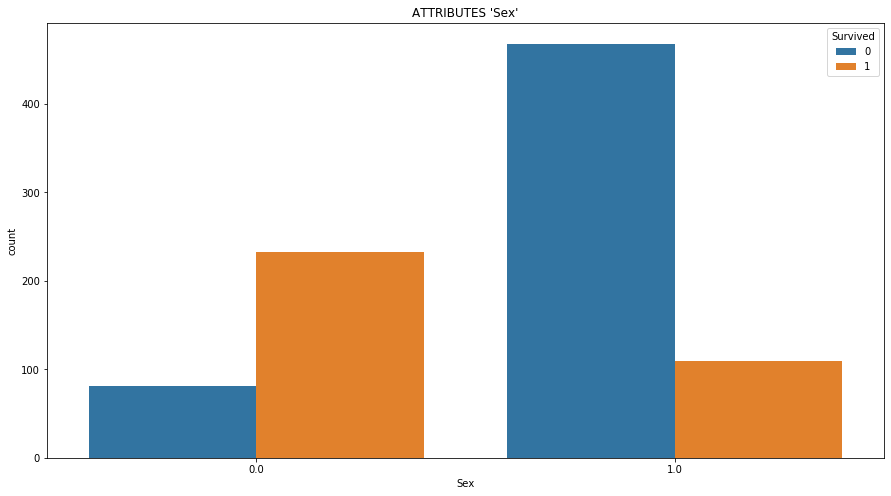

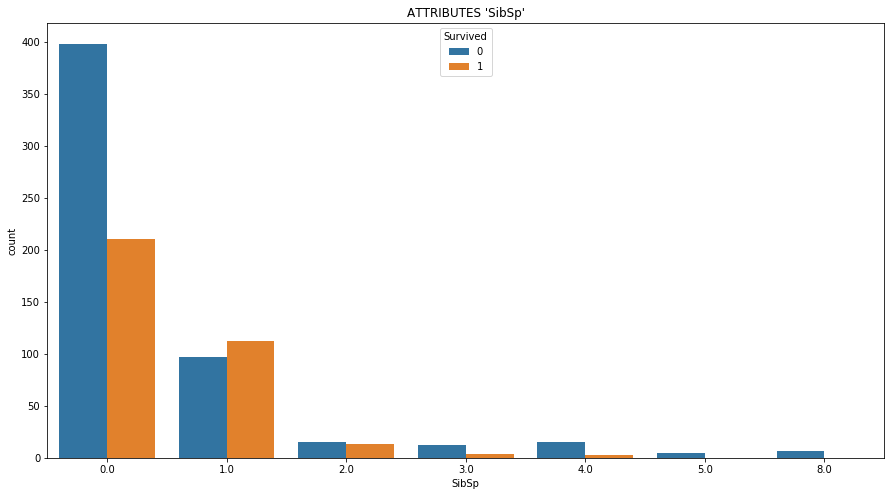

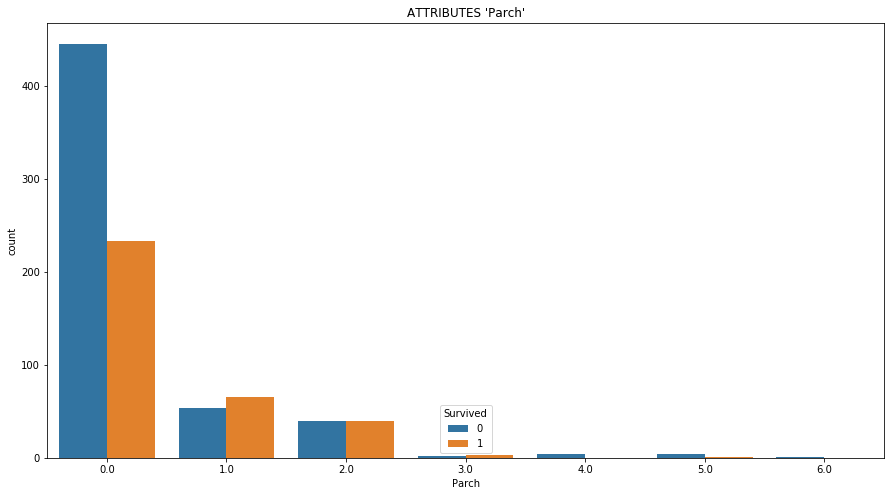

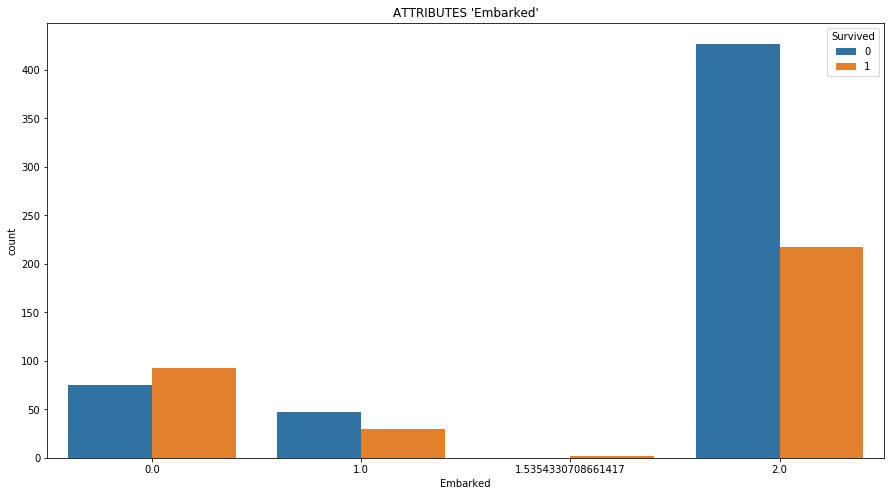

In [24]:
for i in cate:                                #bivariate analysis
    plt.figure(figsize=(15, 8))
    plt.title("ATTRIBUTES '%s'"%i)
    sns.countplot(x[i],hue=df['Survived'])

Observations from graphs:

Most of the passengers of 3rd class did not survived

Most of the females survived while most of the male didn't survive.

People travelling alone had higher survivor rate.

While people who embarked from Cherbourg and Queenstown had almost 50% survival rate, people who embarked from Southampton had a significantly higher survivor rate.

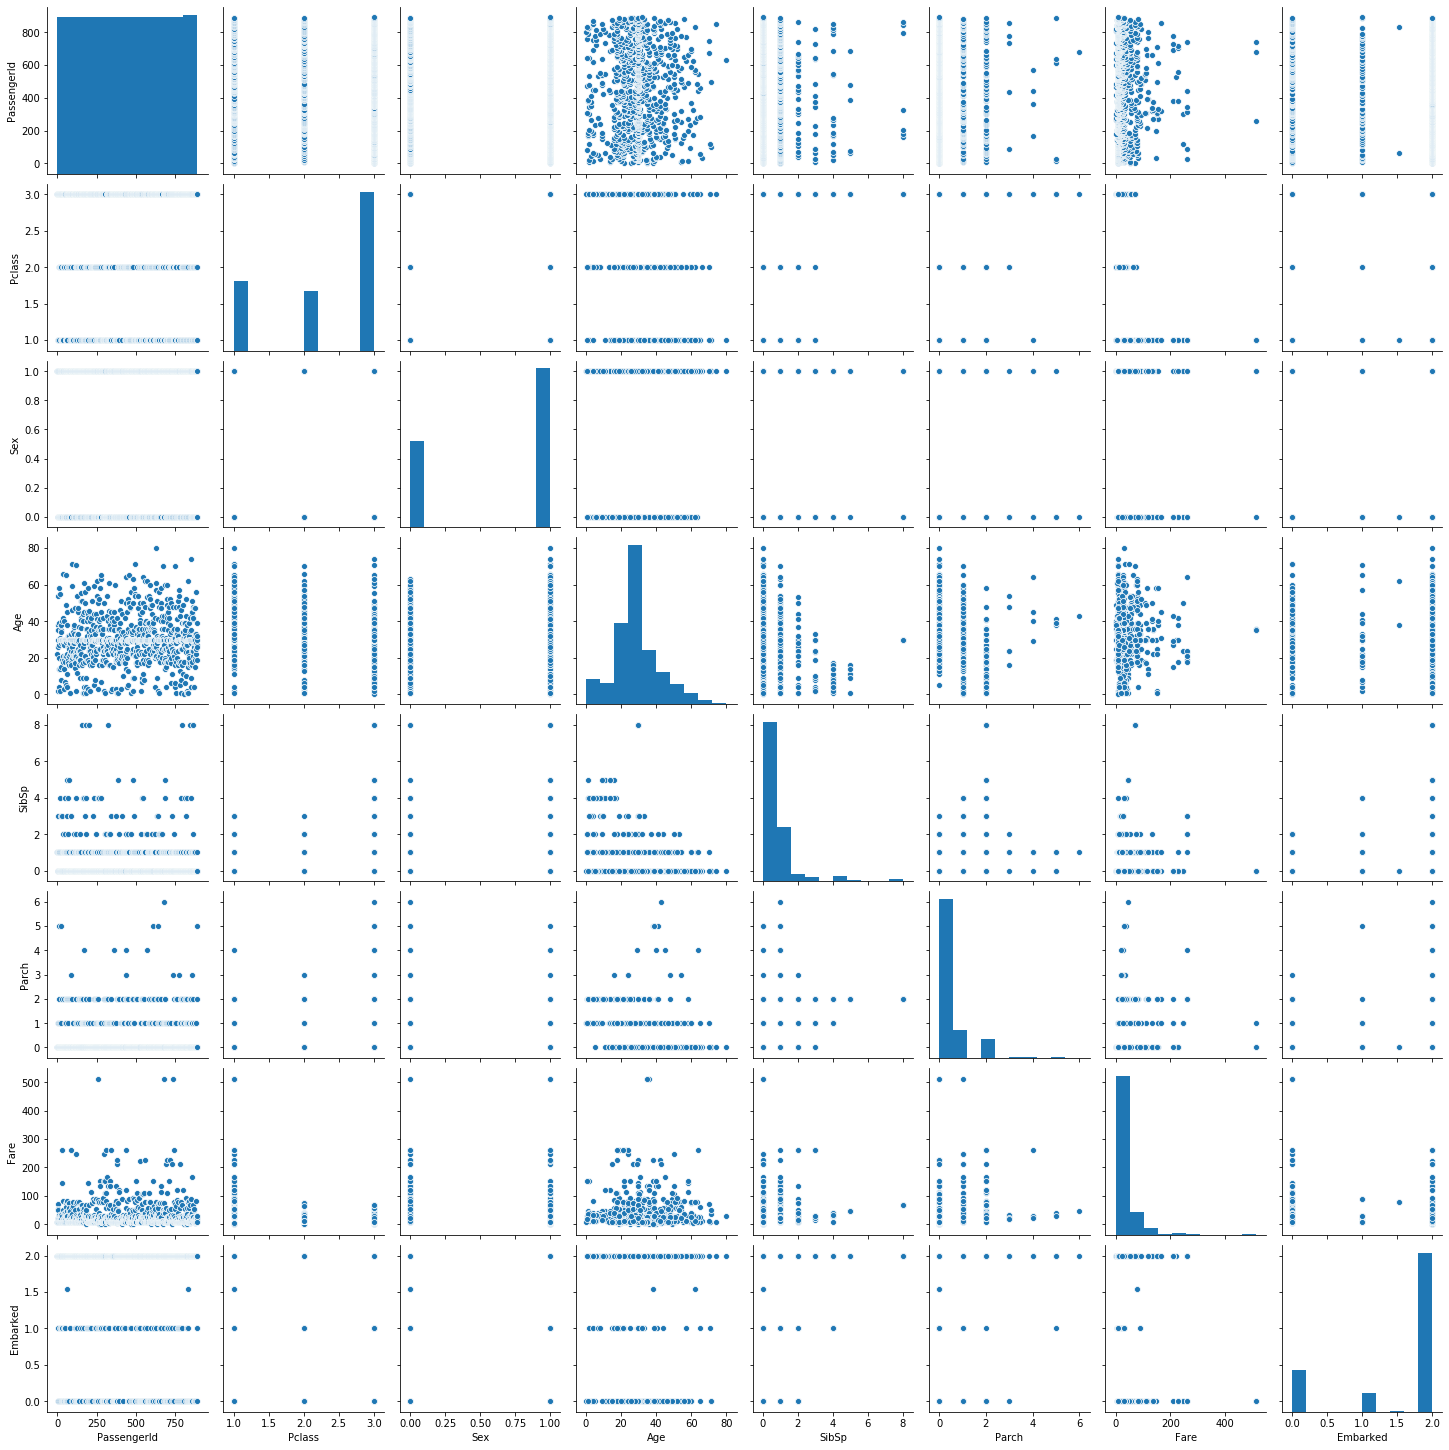

In [25]:
sns.pairplot(x)

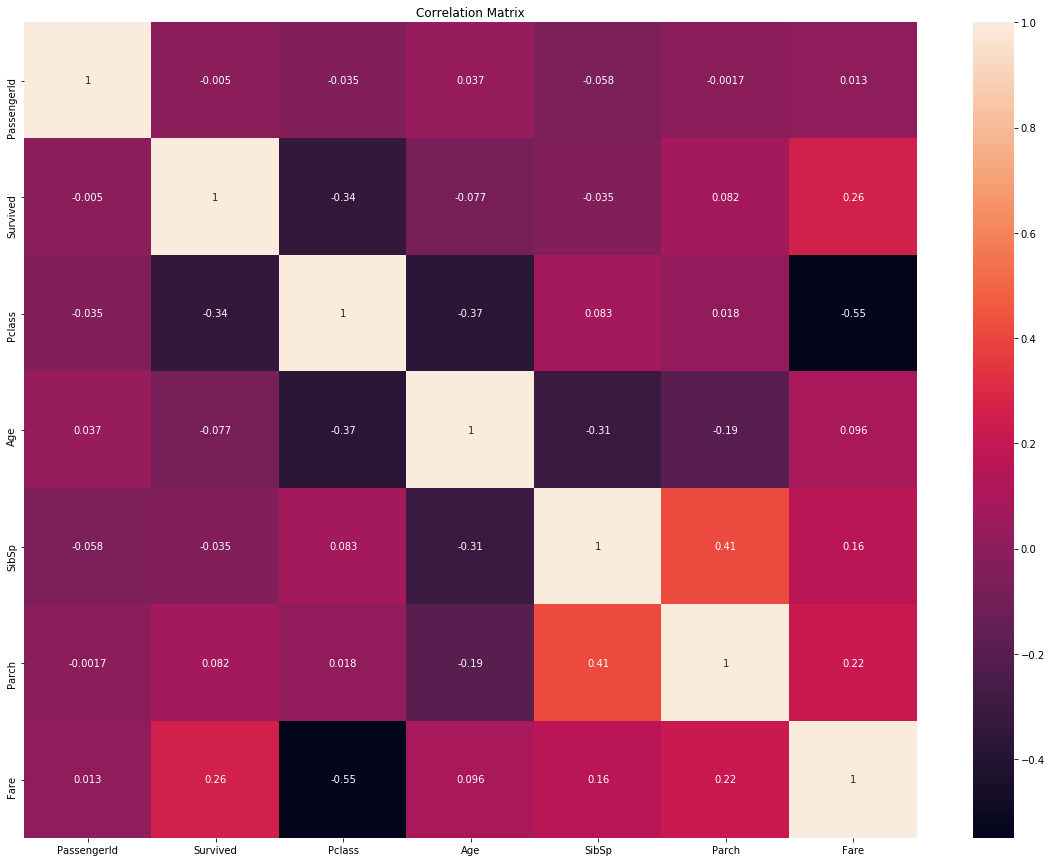

In [26]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

Observations from graph:

Pclass has highest negative correlation with survived at -0.34 and fare has the highest positive correlation with survived at 0.26

Parch and SibSp are the columns with highest positive correlation with each other at 0.41.

Pclass and Fare are the columns with highest negative correlation with each other at -0.55.

# Outliers and Skewness

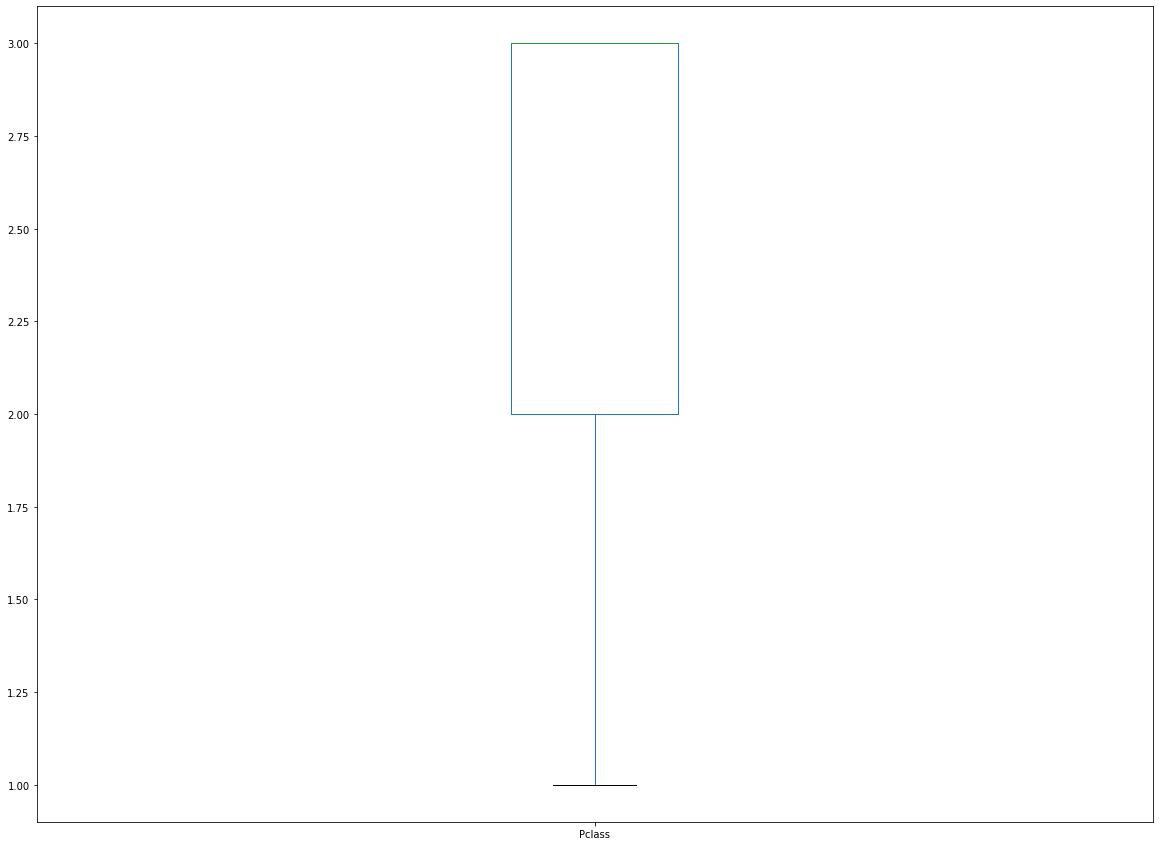

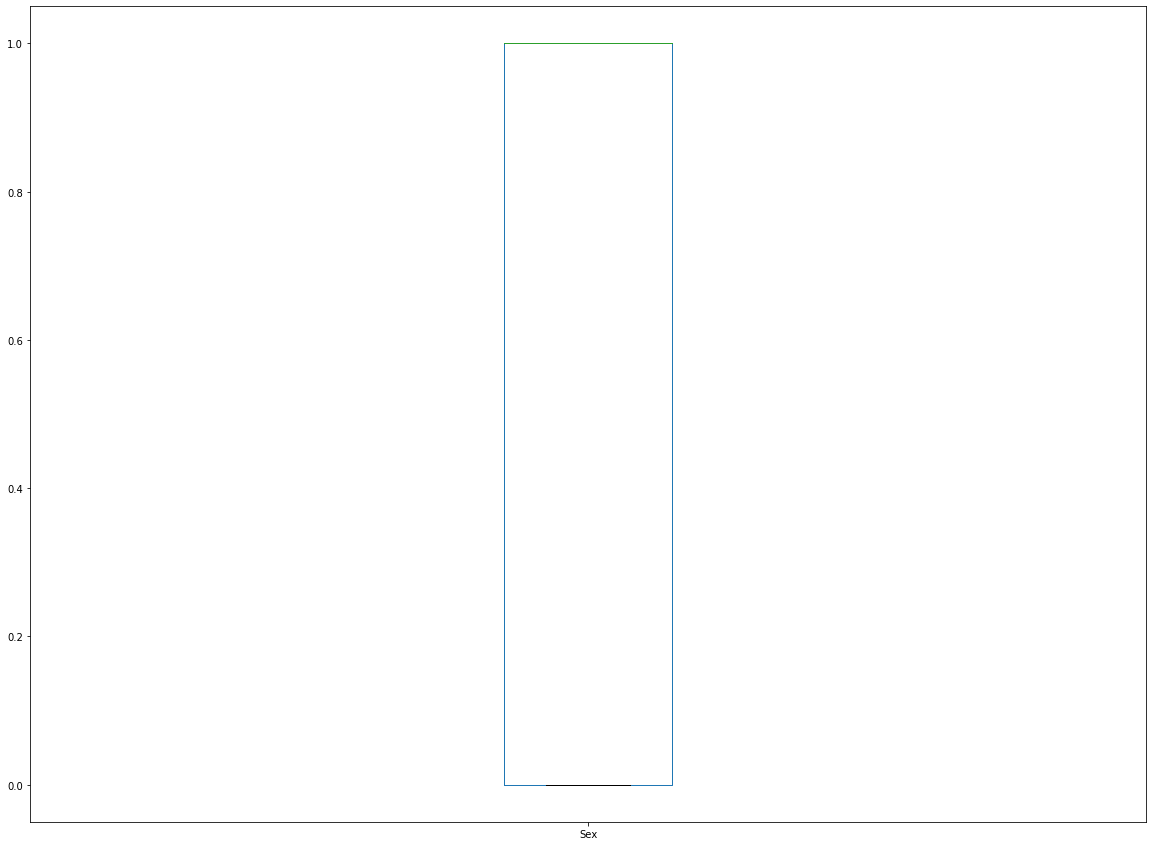

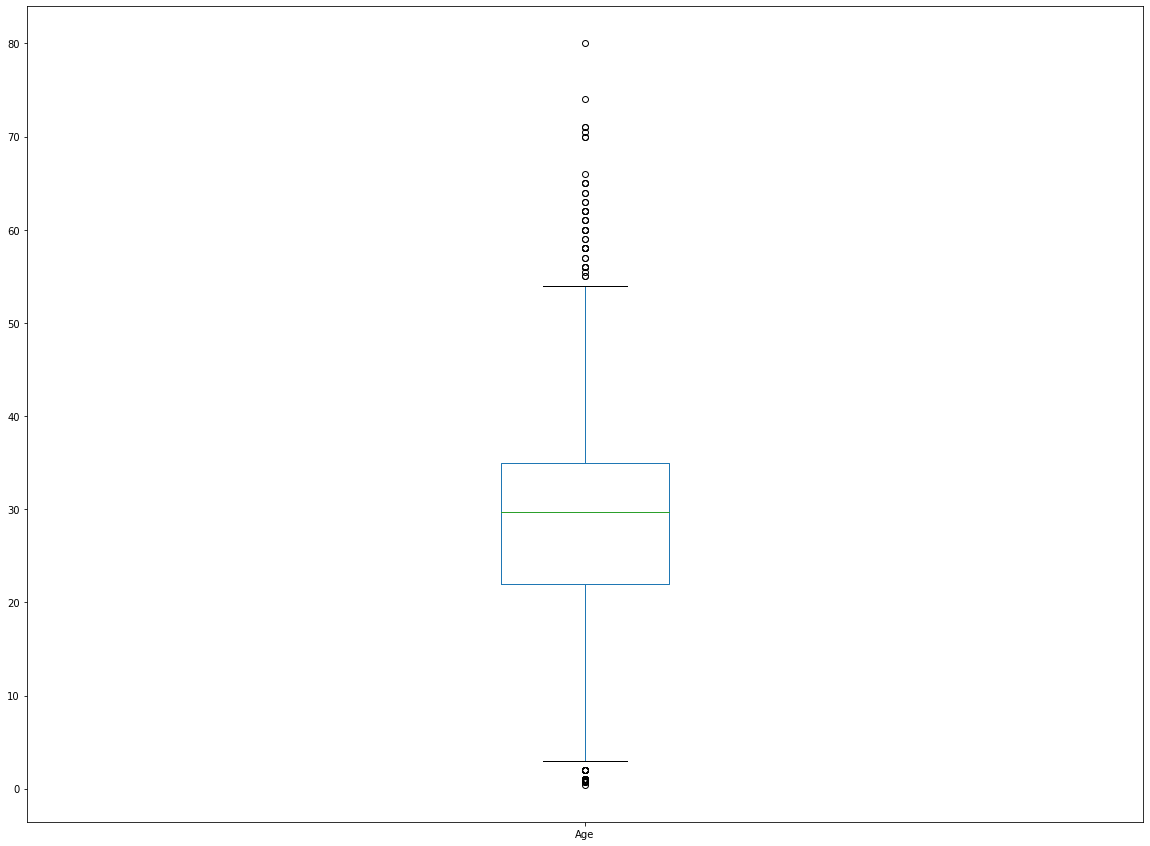

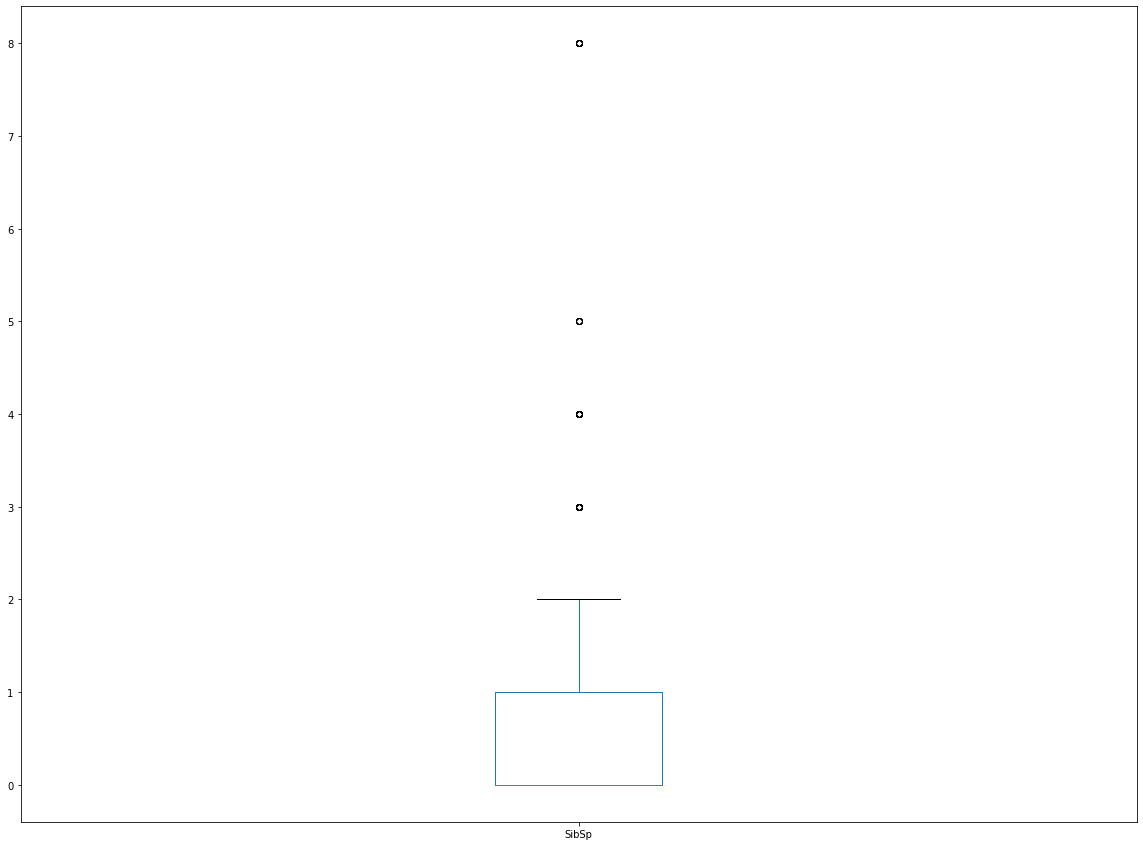

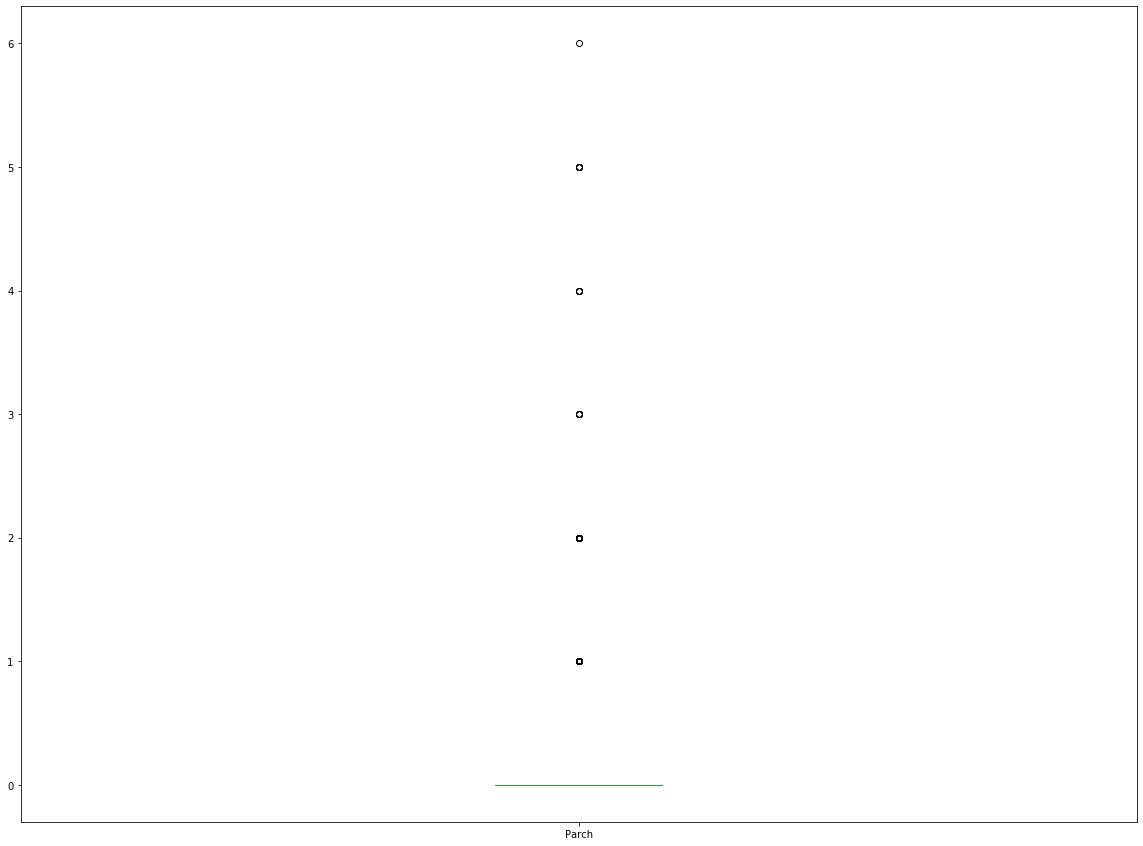

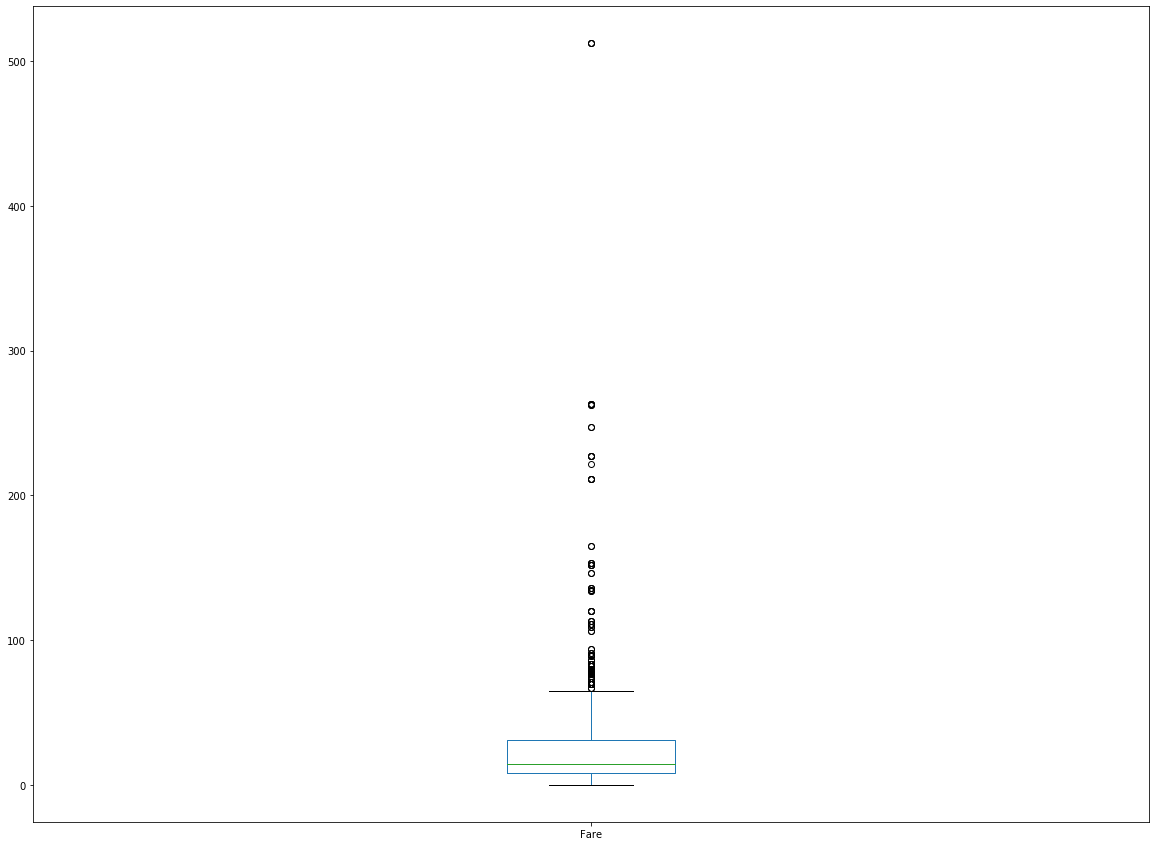

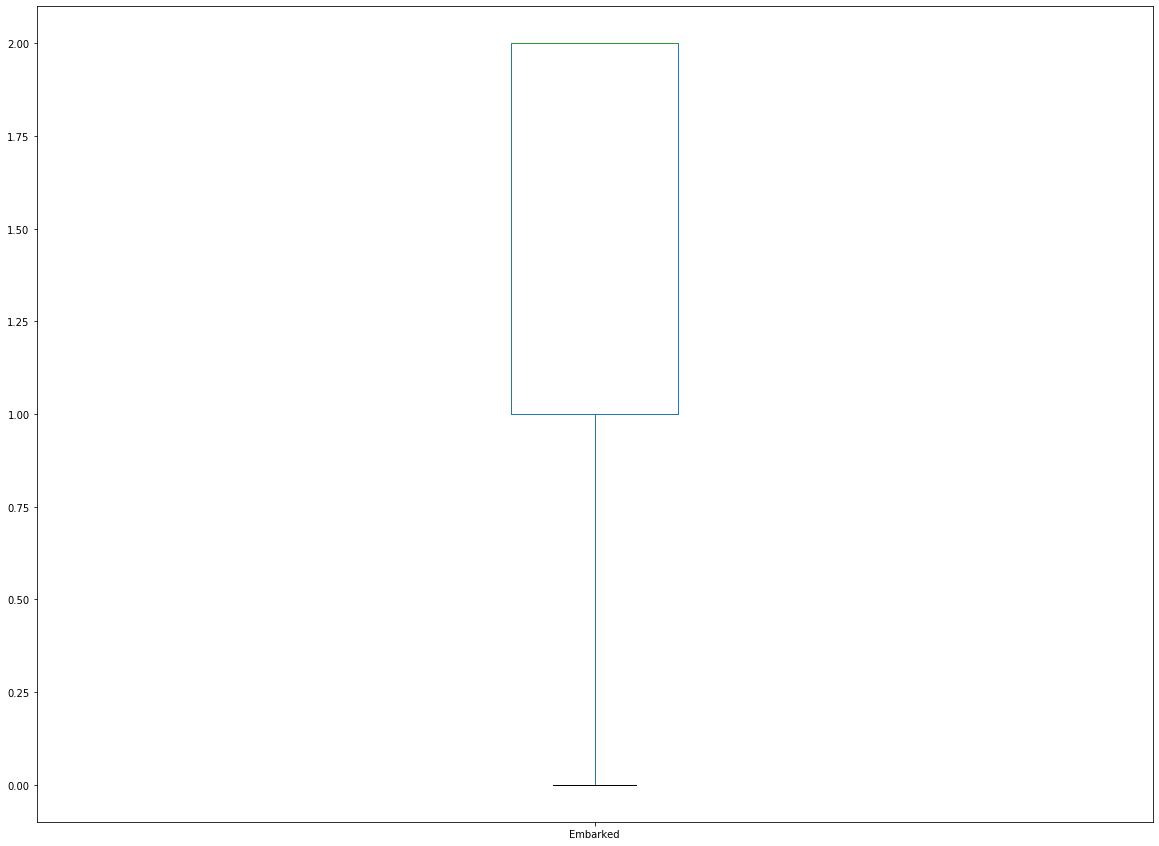

In [27]:
for i in feat[1:]:
    plt.figure(figsize = (20, 15))
    x[i].plot.box()

There are outliers in data but it can't be removed as it is not errors and are relevant to data.

In [28]:
x.skew()

PassengerId    0.000000
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.262780
dtype: float64

In [29]:
from sklearn.preprocessing import power_transform        #removing skewness
df_new = power_transform(x, method='yeo-johnson')        #using yeo-johnson method due to presence of negative skewness
df_new = pd.DataFrame(df_new, columns = x.columns)

In [30]:
df_new.skew()

PassengerId   -0.283201
Pclass        -0.441438
Sex           -0.618921
Age            0.064420
SibSp          0.808608
Parch          1.228795
Fare          -0.040329
Embarked      -1.058979
dtype: float64

Skewness removed significantly in most of the columns with high skewness like Fare, Parch, SibSp, etc.

In [31]:
x = df_new

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

# Best Random State

In [34]:
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.8582089552238806 on Random State 417


# Creating Train Test Split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 417)

In [41]:
LR = LogisticRegression()
nb = GaussianNB()
DTC = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
models = [LR, nb, DTC, svc, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.8582089552238806
[[160  16]
 [ 22  70]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       176
           1       0.81      0.76      0.79        92

    accuracy                           0.86       268
   macro avg       0.85      0.83      0.84       268
weighted avg       0.86      0.86      0.86       268

GaussianNB(priors=None, var_smoothing=1e-09)
0.7985074626865671
[[143  33]
 [ 21  71]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       176
           1       0.68      0.77      0.72        92

    accuracy                           0.80       268


In [43]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)  model is : 0.7923921913250894
 
Cross Validation Score for  GaussianNB(priors=None, var_smoothing=1e-09)  model is : 0.7711129244868495
 
Cross Validation Score for  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')  model is : 0.7588977465319189
 
Cross Validation Sc

Random Forest model has the accuracy score of 82 and cross validation mean of 80, hence it is the best model.

# Hypertuning

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [46]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [48]:
rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [49]:
rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [50]:
rfc1=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=5, criterion='entropy')
rfc1.fit(x_train, y_train)
predrfc1 = rfc1.predict(x_test)
print (accuracy_score(y_test, predrfc1))
print (confusion_matrix(y_test, predrfc1))
print (classification_report(y_test, predrfc1))

0.8470149253731343
[[165  11]
 [ 30  62]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       176
           1       0.85      0.67      0.75        92

    accuracy                           0.85       268
   macro avg       0.85      0.81      0.82       268
weighted avg       0.85      0.85      0.84       268



Accuracy increased from 82 to 85 after hypertuning with GridSearchCV

In [52]:
import joblib

joblib.dump(rfc1, 'TitanicRfc.obj')

['TitanicRfc.obj']